# Clustering task

Here the task is to cluster the [Iris data set](https://en.wikipedia.org/wiki/Iris_flower_data_set) using [K-means](http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html) and [Agglomerative clustering](http://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html) and to visualize the clusters in a 2D vector space.

## Loading the Iris dataset

In [8]:
from sklearn import datasets

iris = datasets.load_iris()
X = iris.data
y = iris.target

print(X[:5])

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]


## Clustering

Use the [K-means](http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html) and [Agglomerative clustering](http://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html) algorithms to cluster the data. Experiment with multiple numbers of clusters.


In [9]:
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering

k = 3
kmeans = KMeans(n_clusters=k).fit(X)
agglomerative = AgglomerativeClustering(n_clusters=k).fit(X)
y_kmeans = kmeans.labels_
y_agglomerative = agglomerative.labels_

## Visualization

Visualize the clusters in a 2D vector space. For the visualization purposes use the PCA dimensionality reduction algorithm. Compare the clusters with the true target values. Which clustering algorithm performs better on the Iris data set?

In [10]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit(X).transform(X)

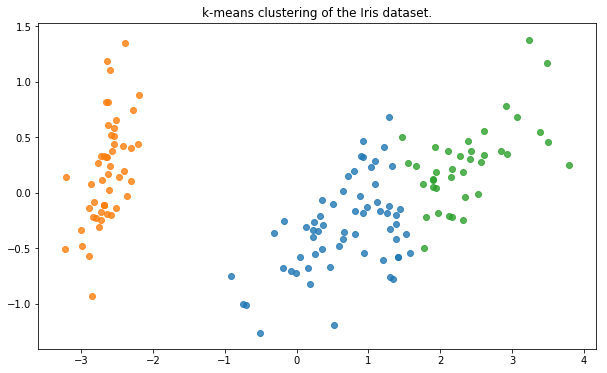

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt

#plot the k-means clusters
plt.figure(figsize=(10,6))
for i in range(k):
    plt.scatter(X_pca[y_kmeans == i, 0], X_pca[y_kmeans == i, 1], alpha=.8)
plt.title('k-means clustering of the Iris dataset.')
plt.show()

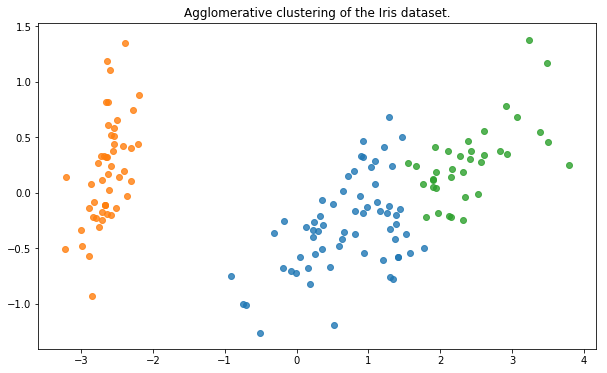

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt

#plot the k-means clusters
plt.figure(figsize=(10,6))
for i in range(k):
    plt.scatter(X_pca[y_agglomerative == i, 0], X_pca[y_agglomerative == i, 1], alpha=.8)
plt.title('Agglomerative clustering of the Iris dataset.')
plt.show()

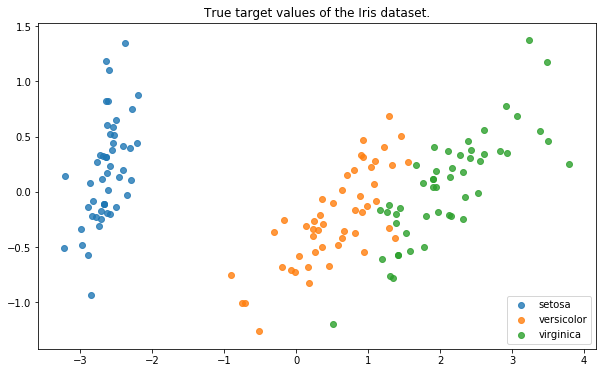

In [13]:
%matplotlib inline
import matplotlib.pyplot as plt

#plot the PCA dimensions
plt.figure(figsize=(10,6))
for i, target_name in enumerate(iris.target_names):
    plt.scatter(X_pca[y == i, 0], X_pca[y == i, 1], alpha=.8, label=target_name)
plt.legend(loc='best')
plt.title('True target values of the Iris dataset.')
plt.legend(loc='lower right')
plt.show()

# Evaluate the results

Compare the result of clustering with true target values using the accuracy score. The mapping between cluster IDs and target classes is ambiguous, thus you need the evaluate all permutations and pick the best one.

In [14]:
import itertools
from sklearn.metrics import accuracy_score

kmeans_accuracies = []
agglomerative_accuracies = []
for permutation in itertools.permutations([0, 1, 2]):    
    kmeans_accuracies.append(accuracy_score(y, list(map(lambda x: permutation[x], y_kmeans))))
    agglomerative_accuracies.append(accuracy_score(y, list(map(lambda x: permutation[x], y_agglomerative))))
    
print ('Accuracy of k-means clustering: {}'.format(max(kmeans_accuracies)))
print ('Accuracy of agglomerative clustering: {}'.format(max(agglomerative_accuracies)))

Accuracy of k-means clustering: 0.8933333333333333
Accuracy of agglomerative clustering: 0.8933333333333333
